In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.odr import *
!git clone https://github.com/JCLMantilla/LabIntermedio

def get_uncertainty(number):
  number=str(number)
  point_pos=0
  dig=len(number)-1
  for i in range(len(number)):
    if number[i]==".":
      point_pos=i
  uncertainty=1/(10**(abs(dig-point_pos)))
  return uncertainty
def get_uncertainty_dframe(dframe):
  new_dframe=dframe.copy()
  for column in new_dframe.columns:
    for index in new_dframe.index:
      new_dframe.loc[index,column]=get_uncertainty(new_dframe.loc[index,column])
  return new_dframe

Cloning into 'LabIntermedio'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 22 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (22/22), done.


In [2]:
d=2.014e-10 # Distancia interplanar del Lif en metros.
############
data=pd.read_csv(filepath_or_buffer="/content/LabIntermedio/actividad4.csv",delimiter=";",float_precision="high")
data_error=get_uncertainty_dframe(data)
###Transformamos la columna de angulos a longitud de onda
data["angulo"]=2*d*np.sin(data["angulo"])
###Transformamos el error con la formula de propagacion de error
data_error["angulo"]=np.abs(2*d*np.cos(data["angulo"])*data_error["angulo"])

longitud_onda_x=[]
longitud_onda_y=[]
longitud_onda_y_error=[]
for column in data.columns[1:]:
  var=0
  longitud_onda_x.append(float(column))
  for index in data.index:
    if data[column][index]!=0.0 and var==0:
      longitud_onda_y.append(data["angulo"][index])
      longitud_onda_y_error.append(data_error["angulo"][index])
      var=1

longitud_onda_x=np.array(longitud_onda_x)
longitud_onda_y=np.array(longitud_onda_y)
longitud_onda_y_error=np.array(longitud_onda_y_error)
#pd.DataFrame({"Longitud de onda":longitud_onda_y,"error":longitud_onda_y_error},index=['13', '15', '17', '19', '21', '23', '25', '27', '29', '31', '33', '35'])

#print(longitud_onda_x)
#########Vamos a transformar el eje x y sus incertidumbres
longitud_onda_x_error=(1/(1000*(longitud_onda_x**2)))*0.1
longitud_onda_x=1/(1000*longitud_onda_x)
#########Vamos a pasar las longitudes de onda a armstrongs

#longitud_onda_y=longitud_onda_y/(1*10e-10)
#longitud_onda_y_error=longitud_onda_y_error/(1*10e-10)

#plt.figure()
#plt.plot(longitud_onda_x,longitud_onda_y)
#plt.show()
data[10:20]
print(longitud_onda_y)
print(longitud_onda_y_error)

[5.88423805e-11 5.11816102e-11 4.48996570e-11 4.00060884e-11
 3.65067547e-11 3.30046407e-11 3.09022289e-11 2.87989700e-11
 2.66953234e-11 2.45905432e-11 2.31868442e-11 2.17828627e-11]
[4.028e-16 4.028e-16 4.028e-16 4.028e-16 4.028e-16 4.028e-15 4.028e-16
 4.028e-16 4.028e-16 4.028e-16 4.028e-16 4.028e-16]


Beta: [ 7.69211522e-07 -9.28975197e-14]
Beta Std Error: [8.47031734e-09 2.98968273e-13]
Beta Covariance: [[ 1.71419102e-17 -5.90921691e-22]
 [-5.90921691e-22  2.13555155e-26]]
Residual Variance: 4.185430628178313
Inverse Condition #: 7.5805636124434e-07
Reason(s) for Halting:
  Sum of squares convergence


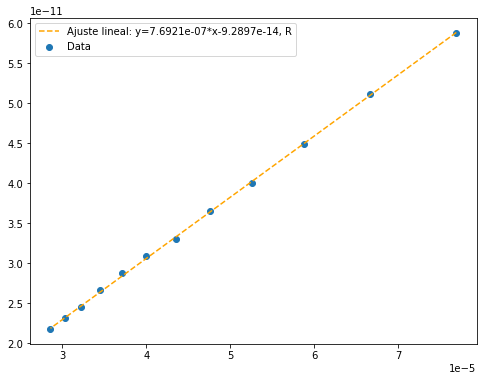

In [3]:

def f(B, x):
    return B[0]*x + B[1]
linear = Model(f)
mydata = RealData(longitud_onda_x, longitud_onda_y, sx=longitud_onda_x_error,sy=longitud_onda_y_error)
myodr = ODR(mydata, linear, beta0=[0,1])
myoutput = myodr.run()
myoutput.pprint()

plt.figure(figsize=(8,6))
x_fit=np.linspace(longitud_onda_x[0],longitud_onda_x[len(longitud_onda_x)-1],100)
y_fit=7.65101050e-07*x_fit+1.24158328e-14
plt.scatter(longitud_onda_x,longitud_onda_y,label="Data")
plt.plot(x_fit,y_fit,linestyle='--',label="Ajuste lineal: y=7.6921e-07*x-9.2897e-14, R",color="Orange")
#plt.errorbar(longitud_onda_x,longitud_onda_y,longitud_onda_y_error, 4*longitud_onda_x_error, ecolor="black",elinewidth=1,linestyle='--',fmt="none")

plt.legend()
plt.show()

In [6]:
c=3.0e+8 #Velocidad de la luz
e=1.6021e-19 #carga electron
m=7.69211522e-07
m_error=8.47031734e-09
h=e*m/c
print(h)
h_error=e*m_error/c
print(h_error)
h_real=6.626070e-34

4.107845931320667e-34
4.523431803471333e-36


In [7]:
100*abs(h-h_real)/h_real

38.0047912062404